In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris =load_iris()
X = iris.data
y= iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9736842105263158


In [4]:
from sklearn.model_selection import cross_val_score    # 引入交叉验证
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')    # cv=5, 分成五组
print(scores.mean())

0.9733333333333334


### n_neighbors=5？看下面学动态调参

In [5]:
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())    # 在列表尾加新对象
plt.plot(k_range, k_scores)

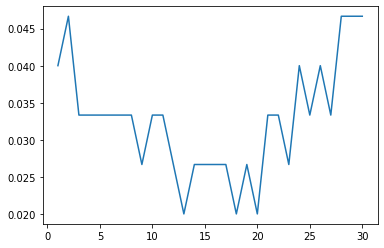

In [6]:
k_loss = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')    # neg_mean_squared_error 均方差
    # scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_loss.append(loss.mean())    # 在列表尾加新对象
plt.plot(k_range, k_loss)